# La transformada de Fourier

**Objetivo.**
Entender y visualizar qué es lo que se obtiene cuando se aplica la transformada de Fourier a una función $f(t)$
continua.

## Contenido

1. [Introducción.](#1)
2. [Definición.](#2)
3. [Transformada de Fourier en $\cos(\omega t)$.](#3)
    - [3.1-Gráfico de $\cos(\omega t)$.](#3-1)
    - [3.2-Visualización gráfica de $\text{TF}(\cos(\omega t))$.](#3-2)
    - [3.3-Visualización completa en 3D.](#3-3)
4. [Transformada de Fourier en un pulso rectangular.](#4)
     - [4.1 - Gráfico del pulso rectangular.](#4-1)
     - [4.2 - Visualización gráfica de su transformada de Fourier.](#4-2)
     - [4.3 - Ondas sinusoidales del pulso rectangular.](#4-4)
     - [4.4 - Visualización completa en 3D.](#4-5)
5. [La transformada de Fourier en la vida cotidiana.](#5)


In [1]:
#Importamos las librerías que se utilizarán es este tema
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D #Gráficos en 3D
from IPython.display import YouTubeVideo#Esta es para poder proyectar videos en una celda de Jupiter Notebook
import ipywidgets as widgets

<a id="1"></a>
## Introducción

La transformada de Fourier es una herramienta matemática que facilita el análisis de señales complejas mediante la transformación de la información del dominio del tiempo al dominio de la frecuencia.
Esta herramienta es ampliamente utilizada tanto en la física, en la ingeniería, incluso en la medicina (por ejemplo, en las resonancias magnéticas) y otras áreas más.

<a id="2"></a>
## Definición.

Se define a la transformada de Fourier para una función $f(t)$, donde $t$ es una variable de tiempo, de la siguiente manera:

$$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-i\omega t}\,dt \tag{1}$$

en donde $\omega$ es la frecuencia angular, y $F(\omega)$ es nuestra función resultante que ahora depende de la frecuencia angular.

De igual manera, también se puede definir una transformada de Fourier inversa, que nos permita descomponer una función dentro del dominio de frecuencias a otra que esté en el dominio del tiempo. Así, definimos a la transformada de Fourier inversa para una función $F(\omega)$ de la siguiente manera:

$$f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} F(\omega)e^{i\omega t}\,d\omega \tag{2}$$

<a id="3"></a>
<div class="alert alert-success">

### Transformada de Fourier en $\cos(\omega_0 t)$

<font color="black">

### Solución
Para nuestra solución, podemos expresar a la función $\cos(\omega_0 t)$ en términos de exponenciales complejas, es decir:

$$
\cos(\omega_0 t) = \frac{e^{i \omega_0 t} + e^{-i \omega_0 t}}{2}
$$

Y de esta manera sustituirla en nuestra definición $(1)$:

$$F(\omega) = \frac{1}{2}\int_{-\infty}^{\infty}  \left(e^{i \omega_0 t} + e^{-i \omega_0 t}\right)e^{-i \omega t} \, dt
$$

Separando la integral de la suma como la suma de integrales, obtenemos que:

$$
F(\omega) = \frac{1}{2} \left( \int_{-\infty}^{\infty} e^{i (\omega_0 - \omega) t} \, dt + \int_{-\infty}^{\infty} e^{-i (\omega_0 + \omega) t} \, dt \right)
$$

En este punto, podemos aplicar una definición muy importante para este tema. La delta de Dirac $\delta(k)$ está definida como:

$$
\int_{-\infty}^{\infty} e^{i k t} \, dt = 2\pi \delta(k) \tag{3}
$$

Entonces, si aplicamos $(3)$ en nuestro ejercicio obtenemos

$$
F(\omega) = \pi \left[ \delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right]
$$

</font>
</div>

</div>

<a id="3-1"></a>
Primero, para poder visualizar en una primera instancia el significado del resultado del ejercicio anterior, en la siguiente celda se mostrará la elaboración de la gráfica de nuestra señal original dada por $f(t) = \cos(\omega_0 t)$

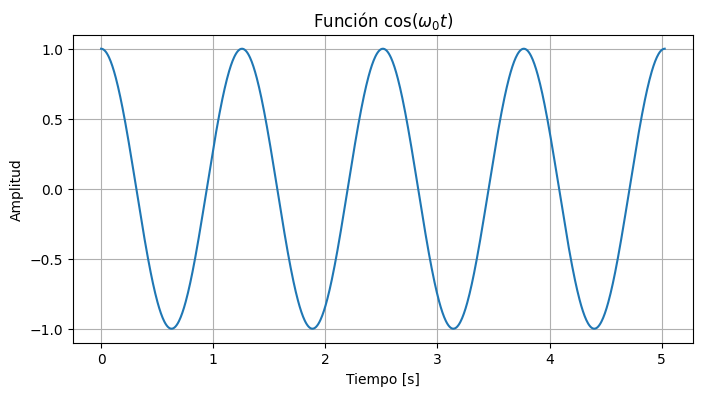

In [2]:
# Primero comenzaremos a nombrar a nuestros parámetros
omega_0 = 5  # Asignamos un valor fijo a la frecuencia de la función coseno
T = 2 * np.pi / omega_0  # Periodo
N = 1000  # Número de puntos
t = np.linspace(0, 4 * T, N)  # Tiempo

# Después, procedemos a definir a nuestra función coseno
f_t = np.cos(omega_0 * t)

# Finalmente, graficamos la señal original
plt.figure(figsize=(8, 4)) #Estas son las dimensiones de nuestra gráfica
plt.plot(t, f_t)
plt.title(r'Función $\cos(\omega_0 t)$', loc="center")#Titulo de la gráfica
plt.xlabel('Tiempo [s]')#Nombre eje horizontal
plt.ylabel('Amplitud')#Nombre eje vertical
plt.yticks(np.arange(-1, 1.5, 0.5))# Esto es para ajustar las divisiones del eje vertical, tal que tome valores de 0.5 en 0.5
plt.grid(True)
plt.show()


<a id="3-2"></a>
Ahora, es necesario hacer una interpretación del resultado que se obtuvo al aplicar la transformada de Fourier.

Tenemos que nuestro resultado está compuesto por la suma de dos funciones delta de Dirac, donde cabe mencionar que esa función tiene la siguiente propiedad:
$$
\delta(k - k') = \left\{ \begin{matrix}
			0, \quad\text{si } k\neq k'\\
			\infty, \quad\text{si } k = k'\\
		\end{matrix}\right.
$$

En nuestro caso, obtuvimos que

$$
F(\omega) = \pi \left[ \delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right]
$$

De donde podemos observar que, para los valores de frecuencia $\omega = \omega_0$ y $\omega = -\omega_0$, nuestra función $F(\omega)$ toma valores infinitamente grandes. Por lo tanto, esto lo podemos interpretar como que nuestra señal original está formada únicamente por estas dos frecuencias bien definidas.

A continuación, se creará un gráfico donde segun el valor que elijamos de $\omega_0$, se mostrará dónde están ubicados esos picos

In [3]:
# Con el fin de hacer un gráfico interactivo, crearemos un Slider para elegir un valor de omega_0

slider = widgets.IntSlider(min=1, max=8, step=2, description='ω') #Int.Slider nos devuelve un un valor entero para omega_0

# Necesitamos crear una función que conecte a nuestra grafica con el valor elegido para el slider
def Transformada(omega_0):
    omega_0 = int(omega_0)  # Aseguramos que el valor elegido sea de tipo entero
    omega = np.linspace(-10, 10, 1000)  # Dominio de las frecuencias

    # Se construirá una función que represente la TF (dos picos en omega_0 y -omega_0)
    TF = np.zeros_like(omega)  # Arreglo de ceros para valores del dominio distintos a omega_0
    TF[np.abs(omega - omega_0) < 0.1] = 10  # Pico en omega_0. 
    TF[np.abs(omega + omega_0) < 0.1] = 10  # Pico en -omega_0

    # Por último, se grafica nuestra TF
    plt.figure(figsize=(8, 4))
    plt.plot(omega, TF)
    plt.title(r'Transformada de Fourier de $\cos(\omega_0 t)$', loc='center')
    plt.xlabel('Frecuencia $\omega$ [rad/s]')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.xticks(np.arange(-10, 11, 1))  # Divisiones en el eje X (frecuencia)

    plt.show()

# Finalmente, proyectamos un Widget para que elegir manualmente el valor deseado
widgets.interact(Transformada, omega_0=slider)


interactive(children=(IntSlider(value=1, description='ω', max=8, min=1, step=2), Output()), _dom_classes=('wid…

<function __main__.Transformada(omega_0)>

<a id="3-3"></a>
## Visualización completa en 3D.

Para poder entender mejor nuestro resultado, será de mucha ayuda elaborar un gráfico que contenga toda esta información, es decir, necesitamos crear algo que nos permita ver cómo nuestra función original puede ser descompuesta en sus respectivas componentes para cada frecuencia permitida.

Además, también será de ayuda representar dichas componentes como picos en el dominio de las frecuencias, ya que esto nos dará el resultado gráfico de la tranformada de Fourier.   

Para poder elaborar esa representación gráfica, recordemos que $\cos(\omega_0 t)$ puede ser expresado de la siguiente forma:

$$\cos(\omega_0 t) = \frac{e^{i\omega_0 t}}{2} + \frac{e^{-i\omega_0 t}}{2} \tag{4}$$

Esto nos dice que nuestra función original se puede expresar como la suma de dos componentes, una con frecuencia $\omega_0$ y otra con frecuencia $-\omega_0$ (tal y como lo indicó la transformada de Fourier). 

Si usamos la identidad de Euler en $\mathbf{(4)}$, nos encontramos con lo siguiente:

$$\cos(\omega_0 t) = \frac{1}{2}(cos(\omega_0 t) + i\sin(\omega_0 t)) + \frac{1}{2}(cos(\omega_0 t) - i\sin(\omega_0 t))$$

Podemos notar que las componentes imaginarias se anulan entre sí, y por tanto, el resultado estará dado por la suma de las respectivas partes reales. Es decir:

$$\cos(\omega_0 t) = Re\left(\frac{e^{i\omega_0 t}}{2}\right) + Re\left(\frac{e^{-i\omega_0 t}}{2}\right)$$

Por lo tanto debemos de graficar esas componentes reales.

Para que nuestras gráficas no queden encimadas en el plano Tiempo-Amplitud, se creará un nuevo eje perpendicular a ese plano, cuyo dominio sea el de las frecuencias. Esto nos permitirá colocar cada compomente sinusoidal a lo largo de este nuevo eje en su respectiva frecuencia .

Posteriormente, podemos indicar, a través de picos, en el plano Frecuencia-Amplitud en qué valores de $\omega$ hay una componente sinusoidal, es decir, en ese plano recrearemos la gráfica de la transformada de Fourier de $\cos(\omega_0 t)$.

In [4]:
#Creamos un nuevo slider
slider2 = widgets.IntSlider(min=1, max=5, step=1, description='ω')

#Definimos la funcion que conectara con el slider

def Grafico_completo(omega_0):

# Comenzaremos creando nuestro espacio en tres dimensiones
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
# Procedemos a crear el rango de tiempo de t = 0 a t = 4pi y definiendo la frecuencia--------------------------------------------------------

    t = np.linspace(0, 4 * np.pi, 500)
    omega_0 = int(omega_0)

#Estos son los ejes cartesianos, que servirán como apoyo visual-------------------------------------------------------------------------------------------

    ax.plot([0,4*np.pi], [0, 0], [0, 0], color='k')  # Eje de t
    ax.plot([0, 0], [-6, 6], [0, 0], color='k')  # Eje de frecuencias
    ax.plot([0, 0], [0, 0], [-2, +2], color='k')  # Eje de amplitud

#Establecemos los limites de 2esos ejes, tal que cuadren con nuestro espacio 3D----------------------------------------------------------------------------

    ax.set_xlim([0, 4*np.pi])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-2,+2])

# Después, se definirán las funciones exponenciales que crean a coseno-----------------------------------------------------------------------------------

    f1 = np.exp(1j * omega_0 * t) / 2
    f2 = np.exp(-1j * omega_0 * t) / 2

# Como se mostró en el desarrollo, sólo se ocupará la parte real de f1 y f2 (se hará uso de np.real())------------------------------------------------------
    onda1 = np.real(f1)
    onda2 = np.real(f2)

# Posteriormente, se definirá a coseno como la suma de esas dos ondas.------------------------------------------------------------------------------------
    coseno = onda1 + onda2

# Aquí se creará un nuevo eje, perpendicular al plano donde vive la gráfica de coseno. Este eje representará el dominio de las frecuencias.----------------
#np.full_like es para que el nuevo eje sea del mismo tamaño que el eje del tiempo, pero que solo contenga un valor especificado
    masomega = np.full_like(t, omega_0) #+\omega_0
    menosomega = np.full_like(t, -omega_0) #-\omega_0

# De esta forma, ya pueden ser graficada la función coseno, así como sus componentes sinusoidales.
#Las entradas de nuestras gráficas en 3D son (tiempo, frecuencia, f(t))

    ax.plot(t, np.zeros_like(t), coseno, 'g', label=r'$\cos(\omega_0 t)$')

    ax.plot(t, masomega, onda1, 'y', label=r'$Re\left(\frac{e^{i\omega_0 t}}{2}\right)$')

    ax.plot(t, menosomega, onda2, 'b', label=r'$Re\left(\frac{e^{-i\omega_0 t}}{2}\right)$')

# Finalizaremos recreando un grafico de la transformada de Fourier.
#El gráfico consistirá en colocar picos en el plano Frecuencia-Amplitud para aquellos valores de frecuencia donde fue colocada la correspondiente componente del coseno.

    ax.plot(np.zeros_like(t), masomega, np.linspace(0,2, len(t)), 'r--', label='Transformada de Fourier')
    ax.plot(np.zeros_like(t), menosomega, np.linspace(0,2, len(t)), 'r--')

    ax.legend()#Etiquetas

# Finalmente, nombraremos a nuestros ejes y daremos un título a nuestra gráfica
    plt.title(r'Construcción de $\cos(\omega_0 t)$ a través de sus ondas sinusoidales', loc="center")
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Frecuencia')
    ax.set_zlabel('Amplitud')
    plt.grid("True")

    plt.show()

#Imprimimos el widget
widgets.interact(Grafico_completo, omega_0=slider2)

interactive(children=(IntSlider(value=1, description='ω', max=5, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.Grafico_completo(omega_0)>

<a id="4"></a>
<div class="alert alert-success">

## Transformada de Fourier en un pulso rectangular.

<font color="black">

Obtener la transformada de Fourier de un pulso rectangular dado por

$$
f(t) = \left\{ \begin{matrix}
			C, &\quad\text{si } -a\leq t \leq a\\
			0, &\quad\text{si } t<-a~~\text{o}~~a<t\\
		\end{matrix}\right.
$$

Recordando la definición $(1)$:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t}\,dt
$$

Separando la integral por intervalos, encontramos lo siguiente

$$
F(\omega) = \cancel{\int_{-\infty}^{-a} 0\cdot e^{-i\omega t}\,dt} + \int_{-a}^{a} C e^{-i\omega t}\,dt + \cancel{\int_{-a}^{\infty} 0 \cdot e^{-i\omega t}\,dt}
$$

$$
F(\omega) = C\int_{-a}^{a} e^{-i\omega t} \,dt = \left. -\frac{C}{i\omega} e^{-i\omega t}\right|_{t = -a}^{a}
$$

Si reacomodamos nuestros términos:
$$
F(\omega) = \frac{C}{\omega}\left(\frac{e^{i\omega a} - e^{-i\omega a}}{i}\right)
$$

Ahora bien, tenemos que la función $\sin(x)$ se puede escribir en términos de exponenciales complejas de la siguiente manera:
$$
\sin(x) := \frac{e^{ix} - e^{-ix}}{2i}
$$

Por lo tanto

$$
F(\omega) = \frac{C}{\omega}\left(\frac{e^{i\omega a} - e^{-i\omega a}}{i}\right) = \frac{2C}{\omega}\left(\frac{e^{i\omega a} - e^{-i\omega a}}{2i}\right)
$$

$$
F(\omega) = \frac{2C}{\omega}\sin(\omega a)
$$

Finalmente, para poder utilizar la siguiente definición:
$$
\text{sinc}(x) := \frac{\sin(x)}{x}
$$

Se hará lo siguiente

$$
F(\omega) = \frac{2C}{\omega}\sin(\omega a) =  2aC\frac{\sin(\omega a)}{\omega a}
$$

Lo que nos devuelve la expresión:

$$
F(\omega) = 2aC~\text{sinc}(\omega a)
$$

<a id="4-1"></a>
A continuación se realizará una visualización gráfica de la señal original $f(t)$.

Sin pérdida de generalidad se hará que $a = 1$ y $C = 1$.

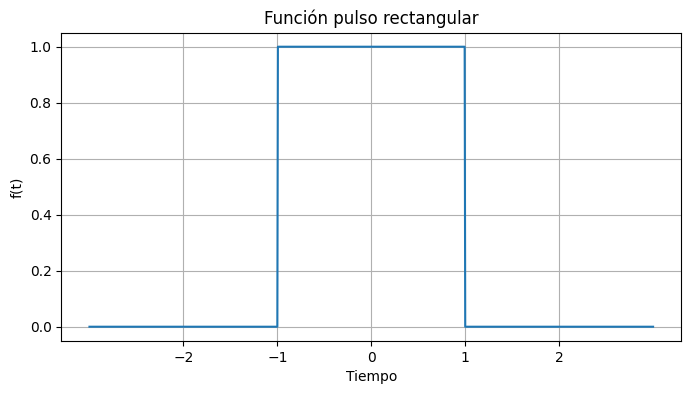

In [5]:
#Se definirán nuestros parámetros

t_0 = 0
t = np.linspace(-3,3,1000)

#Se construirá un arreglo de puntos que represente a nuestro pulso rectangular,

PR = np.zeros_like(t) #Ceros a lo largo del eje t
PR[np.abs(t-t_0)<1] = 1 #Cuando -1<t<1 la función tomará el valor de 1

#Se ejecutará nuestro gráfico

plt.figure(figsize=(8, 4))
plt.plot(t, PR)
plt.title(r'Función pulso rectangular', loc='center')
plt.xlabel('Tiempo')
plt.ylabel('f(t)')
plt.grid(True)

plt.xticks(np.arange(-2,3, 1))  # Divisiones en el eje t

plt.show()

<a id="4-2"></a>
Ahora, se realizará una visualización gráfica de la Transformada de Fourier aplicada en nuestro pulso rectangular. Como vimos anteriormente, tomando $C = 1$ y $a = 1$, el resultado fue
$$
F(\omega) = 2~\text{sinc}(\omega)
$$

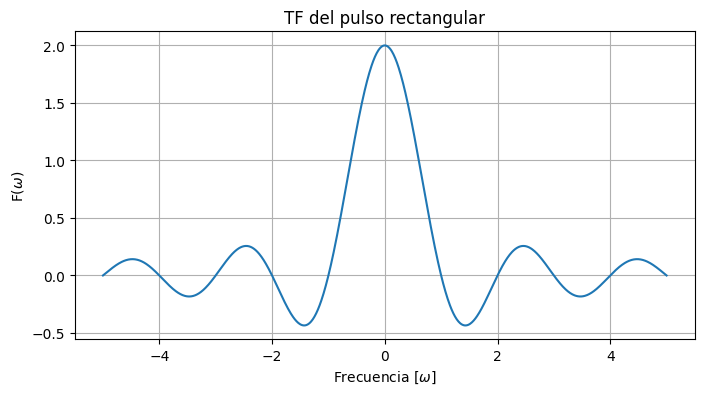

In [6]:
#Definimos a nuestro dominio de frecuencias
omega = np.linspace(-5,5,1000)
#Definimos nuestra función con ayuda de la función ya establecida np.sinc()
FT = 2*np.sinc(omega)

#Ejecutamos nuestro gráfico
plt.figure(figsize=(8, 4))
plt.plot(omega,FT,label=r"2~sinc($\omega$)")
plt.title(r'TF del pulso rectangular', loc='center')
plt.xlabel(r'Frecuencia [$\omega$]')
plt.ylabel(r'F($\omega$)')
plt.grid(True)

plt.show()

<a id="4-3"></a>
Como se mencionó en la definición al inicio de este NoteBook, es posible reconstruir nuestra señal original a través de la transformada inversa de Fourier dada por la Ec.$(2)$. En nuestro caso, la transformada inversa nos dice que

$$
f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} (2~\text{sinc}(\omega))e^{i\omega t} \,d\omega
$$

Si utilizamos la identidad de Euler para la exponencial compleja: $e^{i\omega t} = \cos(\omega t) + i\sin(\omega t)$, hallaremos que

$$
f(t) = \frac{1}{\pi}\left[\int_{-\infty}^{\infty} \text{sinc}(\omega)~\cos(\omega t)\,d\omega + i\int_{-\infty}^{\infty}\text{sinc}(\omega)\sin(\omega t)\,d\omega\right]
$$

Notemos que $\text{sinc}(\omega)$ es una función par $\left(\text{sinc}(-\omega) = \text{sinc}(\omega)\right)$, mientras que $\sin(\omega t)$ es una función impar. Así, obtendremos que $\text{sinc}(\omega)\cdot\sin(\omega t)$ será una función impar. Entonces, si calculamos la integral de una función impar continua dentro de un intervalo simétrico, el resultado de dicha integral será cero. Por lo tanto, nuestra integral con el término imaginario será nula. Y de esta forma, nuestra transformada inversa quedará como:

$$
f(t) = \frac{1}{\pi}\int_{-\infty}^{\infty} \text{sinc}(\omega)~\cos(\omega t)\,d\omega \tag{5}
$$

Este resultado nos dice que para poder reconstruir a nuestra señal original, necesitaremos hacer la suma (integral) de todas las ondas sinusoidales dadas por $\text{sinc}(\omega)\cos(\omega t)$ bajo todo el espectro de las frecuencias $\omega$.

Para poder visualizar como estas ondas sinusoidales construyen al pulso rectangular, haremos un gráfico 

In [7]:
slider3 = widgets.IntSlider(min=0, max=1000, step=50, description='ω') #Creamos un Slider para crear nuestro intervalo de frecuencias

#Función para conectar al Slider con la gráfica
def Pulso_rectangular(a):

    #Definimos cada una de las ondas sinusoidales (i.e. el integrando)
    def Pulso(w, t):
        RP = np.sinc(w/np.pi) * np.cos(w* t)
        return RP


    t = np.linspace(-2.5, 2.5, 1000) #Intervalo de tiempo
    a = int(a)
    omega = np.linspace(-a,a,2*a) #Intervalo de las frecuencias en función del parámetro a
    RP = np.zeros_like(t) #Onda sinusoidal inicial (Puros ceros)

    for w in omega:
        RP += (1/np.pi)*Pulso(w, t) #Creamos un ciclo que nos indica que se creará una onda para cada frecuencia en el intervalo, se sumarán entre sí, y se multiplicará por el factor indicado en (5).

    #Graficamos
    plt.plot(t, RP)
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.title("Reconstrucción del pulso rectangular")
    plt.grid(True)
    plt.show()

widgets.interact(Pulso_rectangular, a=slider3)

interactive(children=(IntSlider(value=0, description='ω', max=1000, step=50), Output()), _dom_classes=('widget…

<function __main__.Pulso_rectangular(a)>

<a id="4-4"></a>
## Visualización completa en 3D.

A continuación se creará un gráfico en tres dimensiones, en el que además de construir a nuestro pulso rectangular a través de sus ondas sinusoidales, también se mostrará cómo es cada una de las ondas sinusoidales y cómo estas contribuyen al gráfico de la transformada de Fourier.

In [9]:
#Nuevo Slider
slider4 = widgets.IntSlider(min=1, max=50, step=1, description='ω')

def G3D(b):

# Comenzaremos creando nuestro espacio en tres dimensiones
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
# Procedemos a crear el rango de tiempo y clasificamos a un nuevo parámetro b que nos dirá cuales frecuencias se utilizarán-------------------------------------------------------------------------------------------------------------------------------

    t = np.linspace(-2.5,2.5, 500)
    b = int(b)

#Estos son los ejes cartesianos, que servirán como apoyo visual-------------------------------------------------------------------------------------------

    ax.plot([-2.5,2.5], [0, 0], [0, 0], color='k')  # Eje de t
    ax.plot([0, 0], [-50, 50], [0, 0], color='k')  # Eje de frecuencias
    ax.plot([0, 0], [0, 0], [-0.5,1], color='k')  # Eje de amplitud

#Establecemos los limites de 2esos ejes, tal que cuadren con nuestro espacio 3D----------------------------------------------------------------------------

    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-50, 50])
    ax.set_zlim([-0.5,1])

# Condiciones iniciales------------------------------------------------------------------------------------------------------------------------------------

    PuRec = np.zeros_like(t)
    sinusoide = np.zeros_like(t)
    w = 1
    frecuencias = np.linspace(-b,b,2*b) #Dominio de frecuencias


    def ondas(w,t):
        sinusoide = np.sinc(w/np.pi)*np.cos(w*t) #Ondas sinusoidales
        return sinusoide

    while w <= b: #Este ciclo hace que, cada que se tenga un valor nuevo de frecuencia dentro del rango establecido, se grafique su respectiva onda sinusoidal y su respectiva posicion
        sinusoide = ondas(w,t)
        ax.plot(t, np.full_like(t, w), sinusoide,color='g') #1. Onda colocada en (t,w,f(t))
        ax.plot(np.zeros_like(t), np.full_like(t, w), np.linspace(0,np.max(sinusoide), len(t)), 'b-')#2.Proyeccion para construir la TF
        ax.plot(t, np.full_like(t, -w), sinusoide, color='r')#1'. Onda colocada en (t,-w,f(t))
        ax.plot(np.zeros_like(t), np.full_like(t, -w), np.linspace(0,np.max(sinusoide), len(t)), 'b-')#2.X2
        w += 1

    for w in frecuencias:
        PuRec += (1/np.pi)*ondas(w,t) #Construimos el pulso rectangular

    ax.plot(t, np.full_like(t, 0),PuRec, color='k')  #Graficamos el PR

    #Asignamos nombres
    plt.title(r'Construcción del pulso rectangular a través de sus componentes sinusoidales', loc="center")
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Frecuencia')
    ax.set_zlabel('Amplitud')
    plt.grid("True")
    plt.show()

widgets.interact(G3D, b=slider4) 

interactive(children=(IntSlider(value=1, description='ω', max=50, min=1), Output()), _dom_classes=('widget-int…

<function __main__.G3D(b)>

<a id="5"></a>
## La transformada de Fourier en la vida cotidiana

La música es algo que ha estado presente desde tiempos muy antigüos, puede asegurarse que es parte importante de la historia de la humanidad. Esta afirmación está basada en que en ocaciones es fácil identificar una epoca en la historia a través de una pieza musical ligada a dicha época.

Las personas necesitan de la música para realizar diversas actividades en su vida cotidiana, tales como trasladarse a un lugar, hacer ejercicio, trabajar, estudiar, bañarse o incluso dormir. La música es un fenómeno universal, es por eso que resulta natural que exista una enorme variedad de géneros musicales. 

Debido a esta gran diversidad de géneros musicales, y por lo tanto, de canciones. Es lógico que una persona no sea capaz de conocer el nombre de todas las canciones existentes, lo cual genera un pequeño problema, pues si alguien escucha una canción que le llama su atención pero desconoce su nombre o su autor, y además no hay dónde consultar esa información, entonces quizá esa persona se quede con la duda por mucho tiempo (o para siempre en el peor de los casos).

Afortunadamente, existe una solución a este problema y esa solución utiliza a la Transformada de Fourier como herramienta principal. Un ejemplo actual y muy popular, es la App llamada "Shazam", la cual capta el sonido de la canción a descubrir para después descomponer a la señal recibida en señales más simples que están en función de su frecuencia. Y a través de un análisis de dichas señales, la App nos devuelve el nombre y el autor de la canción.

A continuación se mostrará un video donde explica cómo es el análisis de canciones a través de estudio de las señales que la componen.

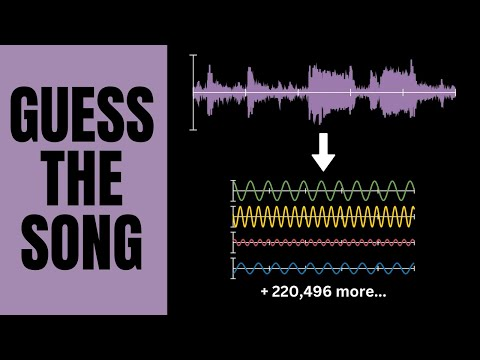

In [10]:
YouTubeVideo('G7XL-7rj45M', width=560, height=315)